# Colorization

**Fully Convolutional Networks: UNet Version**


In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
from PIL import Image
import torchvision.transforms as transforms
from model import unet
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

### Load UNet Model 

In [17]:
def load_model(param_path):
    
    net = unet.UNet()
    net.load_state_dict(torch.load(param_path))
    
    return net
    

In [2]:
transform_toPIL = transforms.Compose([
    transforms.ToPILImage(),
])

transform_totensor = transforms.Compose([
    transforms.ToTensor()
])
    

In [18]:
def inference(image, net):
    gen_images = net(image)
    return gen_images


In [3]:
def load_images(paths):
    images = []
    for path in paths:
        img = cv.imread(path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, (32, 32))
        #img = Image.open(path)
        images.append(img)
    return images


In [4]:
def gray(image):
    r = image[0]
    g = image[1]
    b = image[2]
    tensor = 0.299 * r + 0.587 * g + 0.114 * b
    return tensor

def batch_gray(images):
    """
    Grayscale for Batch Images
    :param images: [B, C, H, W]
    :return: [B, H, W]
    """
    batch_size = images.size()[0]
    h = images.size()[2]
    w = images.size()[3]
    result = Variable(torch.zeros([batch_size, h, w]))
    for i in xrange(batch_size):
        result[i] = gray(images[i])

    return result

In [5]:
def show(gen_images, origin_images):
    nums = 4
    plt.figure(figsize=(100,80))
    while i < nums*2:
        plt.subplot(nums*2, 1, i)
        i = i + 1
        plt.imshow(gen_images[i])
        plt.subplot(nums*2, 1, 1)
        plt.imshow(origin_images[i])
        i = i + 1


In [6]:
image_dir = 'test_images/'
image_paths = [image_dir+'%s.jpg' % x for x in range(1,5)]

In [7]:
image_paths

['test_images/1.jpg',
 'test_images/2.jpg',
 'test_images/3.jpg',
 'test_images/4.jpg']

In [19]:
model_param = 'model_params/epoch_19_cpu_params.model'
net = load_model(model_param)

In [8]:
images = load_images(image_paths)

In [9]:
transform_images = []
for image in images:
    transform_images.append(transform_totensor(image))

In [10]:
test_one = transform_images[2]
test_one.size()

torch.Size([3, 32, 32])

In [11]:
gray_one = gray(test_one)

In [12]:
gray_one.size()

torch.Size([32, 32])

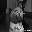

In [13]:
gray_one = gray_one.unsqueeze(0)
transform_toPIL(gray_one)

In [14]:
gray_one = gray_one.unsqueeze(0)


In [15]:
gray_one.size()

torch.Size([1, 1, 32, 32])

In [16]:
gray_input = Variable(gray_one)

In [20]:
p = inference(gray_input, net)

In [21]:
p = p.squeeze(0)

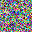

In [22]:
transform_toPIL(p.data)

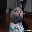

In [23]:
transform_toPIL(test_one)

In [24]:
from model import net

In [25]:
gray_layer = net.GrayLayer()

In [27]:
test_one.size()

torch.Size([3, 32, 32])

In [28]:
mm = gray_layer(test_one.unsqueeze(0))

In [29]:
transform_toPIL(mm.daa)

AssertionError: pic should be Tensor or ndarray